## Plan:
Use the built in dataset from keras/TF, use some convolutional layers followed by a dense layer with 10 nodes to produce 'one-hot' style labels for MNIST data.

In [ ]:
import tensorflow.keras

### Import and preprocess data

` mnist.load_data()` returns tuple ` (x_train,y_train),(x_test,y_test)`
* `x_train` is an numpy array containing 60000 28x28 images
* `y_train` is an numpy array containing 60000 lables ranging from '0,1,2, ... 9'
* `x_test` is a numpy array containing 10000 28x28 images
* `y_test` is an numpy array containing 10000 lables ranging from '0,1,2, ... 9'.


I will import the ys as `..._digits` to make it obvious that they are not one-hot vectors.



In [ ]:
(x_train,y_train_digits),(x_test,y_test_digits) = tensorflow.keras.datasets.mnist.load_data()

Now to turn the lables into one-hot vectors, keras has a built in function `utils.to_categorical()`. This is pretty much instant for this data so there is no point trying to code something better.

In [ ]:
y_train = tensorflow.keras.utils.to_categorical(y_train_digits)
y_test = tensorflow.keras.utils.to_categorical(y_test_digits)

Also we need the images to be rescaled to be between 0 and 1 instead of their current 0 to 255 range.

In [ ]:
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

### Inspect the data

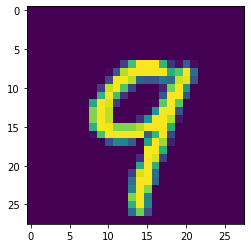

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_test[12])

### Defining the network

The dataset forces an output of 1 by 10 to be comperable with the lables.
So as before:

1.   Input layer takes 28 by 28 image
2.   The convolutional layer wants its input in a slighly different format, so the reshape layer does this conversion.
3.   1st convolutional layer runs 8 5x5 kernel result of previous layer with the chosen activation.
4.   A max pooling layer.
5.   2nd convolutional layer runs 6 3x3 kernel result of previous layer with the chosen activation.
6.   A max pooling layer.
5.   Flatten layer is required to flatten all the outputs of the previous layer, so that the dense layer will produce a one dimensional vector.
6.   An intermediate dense layer.
7.   Dense layer with 10 nodes interprets previous layer into a 10x1 vector for comparison with lables.


`sigmoid()` was chosen as it's basic and works well enough.

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Reshape, Flatten, MaxPooling2D
chosen_activation = tensorflow.keras.activations.sigmoid

In [ ]:
model=tensorflow.keras.Sequential()
model.add(Input(shape=(28,28)))
model.add(Reshape((28,28,1)))
model.add(Conv2D(8,5,activation = chosen_activation))
model.add(MaxPooling2D())
model.add(Conv2D(6,3,activation = chosen_activation))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(24,activation='relu'))
model.add(Dense(10,activation='softmax'))

The model summary looks like this:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 6)         438       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 6)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)               

There is also a handy plot:

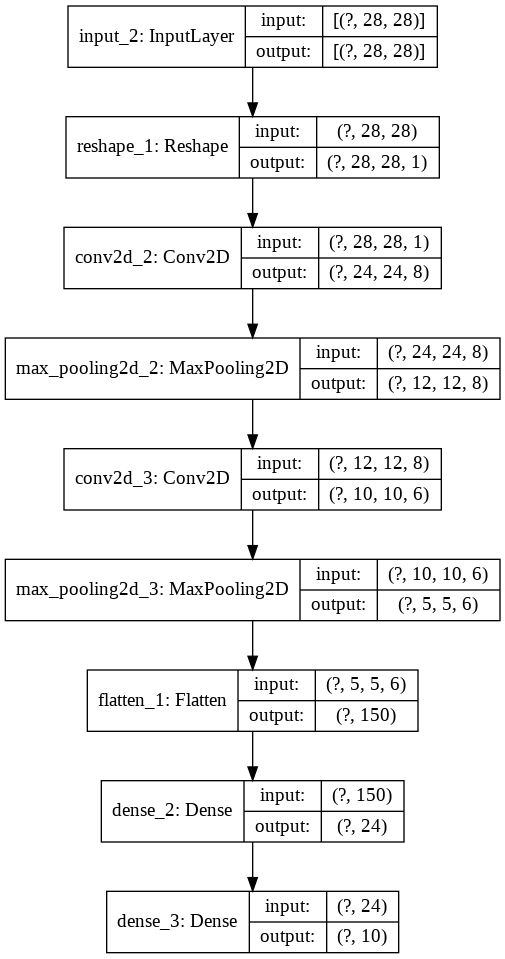

In [ ]:
tensorflow.keras.utils.plot_model(model,show_shapes='true')

### Now for the training

For loss I chose `MeanSquaredError()` as its simple and should do fine when comparing two vectors.

For the optimizer I'm using `RMSprop()`. It seems to work well.

In [ ]:
chosen_loss = tensorflow.keras.losses.MeanSquaredError()
chosen_optimizer = tensorflow.keras.optimizers.RMSprop()
model.compile(
    loss=chosen_loss,
    optimizer=chosen_optimizer,
    metrics=["accuracy"],
)

Be sure to use GPU acceleration for training if available. Each step will only take about 9s in a Collab GPU accelerated instance.

In [ ]:
history = model.fit(x_train,y_train,epochs=25,validation_data=(x_test,y_test))

Epoch 1/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0435 - accuracy: 0.6693 - val_loss: 0.0138 - val_accuracy: 0.9149
Epoch 2/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0107 - accuracy: 0.9326 - val_loss: 0.0075 - val_accuracy: 0.9549
Epoch 3/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0070 - accuracy: 0.9557 - val_loss: 0.0061 - val_accuracy: 0.9596
Epoch 4/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0056 - accuracy: 0.9639 - val_loss: 0.0048 - val_accuracy: 0.9695
Epoch 5/25
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0049 - accuracy: 0.9685 - val_loss: 0.0044 - val_accuracy: 0.9714
Epoch 6/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0044 - accuracy: 0.9715 - val_loss: 0.0040 - val_accuracy: 0.9734
Epoch 7/25
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0041 - accuracy: 0.9743 - val_loss: 0.0034 -

### Evaluating the network
Let's see a timeline of the accuracy.

In [ ]:
validation_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

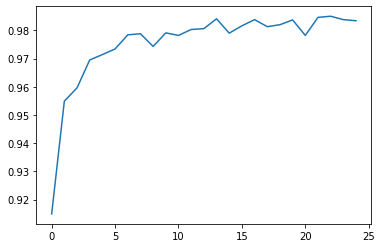

In [ ]:
plt.plot(validation_accuracy)

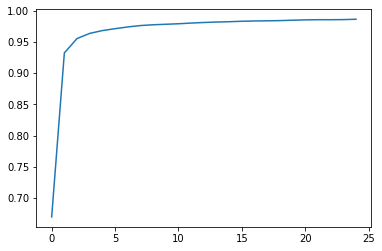

In [ ]:
plt.plot(accuracy)

Let's see how well it works

In [ ]:
import numpy as np
prediction = model.predict(x_test)

Image number 9272 looks like this!
The network thinks this is a: 9
In reality this is (also) a: 9


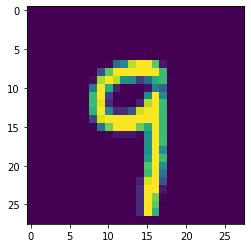

In [ ]:
i = np.random.randint(0,prediction.shape[0])
print('Image number ' + str(i) + ' looks like this!')
plt.imshow(x_test[i])
print('The network thinks this is a: ' + str(np.argmax(prediction[i])))
print('In reality this is (also) a: ' + str(np.argmax(y_test[i])))

Let's check the overall accuracy:

In [ ]:
result = model.evaluate(x_test,y_test)
print('Overall the loss is: ' + str(result[0]) + '. This is a bit meaningless.')
print('The more meaningful accuracy is: '+ str(result[1]*100) + '%')

313/313 [==============================] - 2s 5ms/step - loss: 0.0026 - accuracy: 0.9834
Overall the loss is: 0.0025522869545966387. This is a bit meaningless.
The more meaningful accuracy is: 98.33999872207642%


## Implementing an app for demonstration

Now save the model and make a javascript app to demonstrate how it works.
Check the github where this notebook as well as the code for the javascript app can be found.

1. `model.save()` saves the model in the python keras format.
2. `!pip install tensorflowjs` installs the packages necessary for converting to the proper format.
3. `!tensorflowjs_converter --input_format keras model.h5 js_model` runs the bash command to carry out the conversion

In [ ]:
model.save('model.h5')

In [ ]:
!pip install tensorflowjs

In [ ]:
!tensorflowjs_converter --input_format keras model.h5 js_model

The next section zips and downloads the converted model folder, you may not want to do this, set `download_model=True` and run the cell if you do want to do this.

In [ ]:
download_model = False
if download_model:
  !zip -r js_model.zip js_model
  from google.colab import files
  files.download("js_model.zip")


updating: js_model/ (stored 0%)
updating: js_model/model.json (deflated 78%)
updating: js_model/group1-shard1of1.bin (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>